In [1]:
# nlp
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
import re
# parser
from bs4 import BeautifulSoup
# data
import pandas as pd
import numpy as np
# requests
import requests
import os
# random
import random
# error mute
import contextlib
# my scripts
import acquire as a
import prepare as p
import env

# Spam Data

- a. Load the spam data set.
- b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
- c. Is there any overlap in the bigrams for the spam data and the ham data?
- d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.


In [2]:
df = a.get_spam()

In [3]:
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
# cleaned, lemme = p.prep_data(df, lemme=True)
# df['cleaned'] = cleaned
# df['lemme'] = lemme

In [6]:
df

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."


In [7]:
def clean(text, extra_words=None, exclude_words=None):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    if extra_words != None:
        stopwords = nltk.corpus.stopwords.words('english') + extra_words
    else:
        stopwords = nltk.corpus.stopwords.words('english')
    
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore')\
             .decode('utf-8', 'ignore')\
             .lower()
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [8]:
df['cleaned'] = df.text.apply(clean)

In [9]:
df

,label,text,cleaned
id,,,
0,ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]"
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[2nd, time, tried, 2, contact, u, u, a750, pou..."
5568,ham,Will Ì_ b going to esplanade fr home?,"[i_, b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[pity, mood, soany, suggestion]"


In [10]:
labels = pd.concat([df.label.value_counts(),
                    df.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
label,,
ham,4825,0.865937
spam,747,0.134063


In [11]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

show_counts_and_ratios(df, "label")


,n,percent
label,,
ham,4825,0.865937
spam,747,0.134063


In [12]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [13]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

spam_freq.head()


call    359
free    216
2       173
u       155
txt     150
Name: count, dtype: int64

In [14]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

word_counts.sort_values(by='all', ascending=False).head(10)


,all,ham,spam
u,1182,1027,155
call,600,241,359
2,478,305,173
im,462,449,13
get,397,314,83
ur,384,240,144
go,304,273,31
4,287,168,119
dont,279,257,22
ok,277,272,5


In [15]:
pd.concat([word_counts[word_counts.spam == 0].sort_values(by='ham').tail(6),
           word_counts[word_counts.ham == 0].sort_values(by='spam').tail(6)])


,all,ham,spam
i_,117,117,0
say,118,118,0
da,132,132,0
later,134,134,0
lor,160,160,0
ltgt,276,276,0
awarded,38,0,38
18,43,0,43
guaranteed,50,0,50
tone,73,0,73


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most common words')

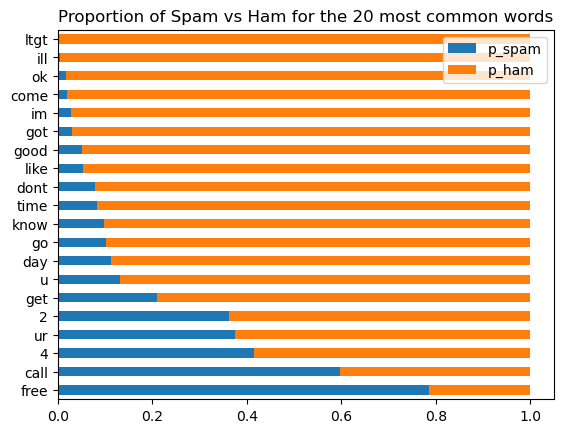

In [17]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['all'],
         p_ham=word_counts.ham / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')


In [18]:
from wordcloud import WordCloud

all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ham_words))
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Ham')
axs[2].set_title('Spam')

for ax in axs: ax.axis('off')


KeyboardInterrupt: 

In [ ]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))

top_20_ham_bigrams.head()


(call, later)    52
(ill, call)      48
(let, know)      41
(sorry, ill)     39
(r, u)           37
Name: count, dtype: int64

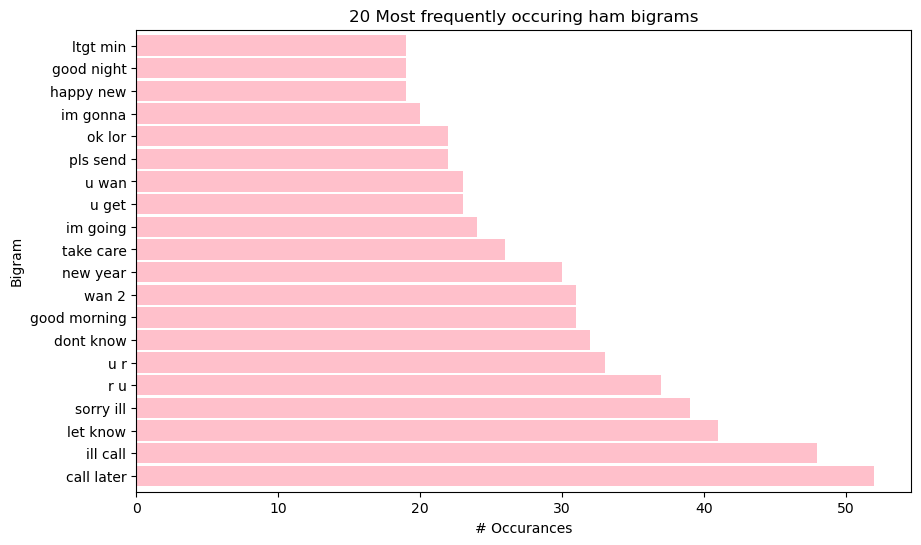

In [ ]:
top_20_ham_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)


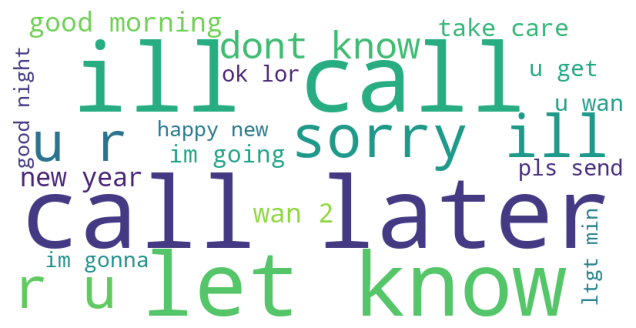

In [ ]:
# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()


# 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [ ]:
codeup = a.get_codeup()

This is the URL USED: https://codeup.edu/featured/apida-heritage-month/
This is the URL USED: https://codeup.edu/featured/women-in-tech-panelist-spotlight/
This is the URL USED: https://codeup.edu/featured/women-in-tech-rachel-robbins-mayhill/
This is the URL USED: https://codeup.edu/codeup-news/women-in-tech-panelist-spotlight-sarah-mellor/
This is the URL USED: https://codeup.edu/events/women-in-tech-madeleine/
This is the URL USED: https://codeup.edu/codeup-news/panelist-spotlight-4/


In [ ]:
codeup['test'] = codeup.content

In [ ]:
codeup.test

0    ['May 24, 2023 | Featured', 'May is traditiona...
1    ['Mar 28, 2023 | Events, Featured', 'Codeup is...
2    ['Mar 20, 2023 | Events, Featured', 'Codeup is...
3    ['Mar 13, 2023 | Codeup News, Featured', 'Code...
4    ['Mar 6, 2023 | Events, Featured', 'Codeup is ...
5    ['Feb 16, 2023 | Codeup News, Events, Featured...
Name: test, dtype: object

In [ ]:
# Assuming my_series is your Series
my_series = codeup.test.apply(lambda x: ' '.join(substring for substring in x))


In [ ]:
my_series

0    [ ' M a y   2 4 ,   2 0 2 3   |   F e a t u r ...
1    [ ' M a r   2 8 ,   2 0 2 3   |   E v e n t s ...
2    [ ' M a r   2 0 ,   2 0 2 3   |   E v e n t s ...
3    [ ' M a r   1 3 ,   2 0 2 3   |   C o d e u p ...
4    [ ' M a r   6 ,   2 0 2 3   |   E v e n t s , ...
5    [ ' F e b   1 6 ,   2 0 2 3   |   C o d e u p ...
Name: test, dtype: object

In [ ]:
codeup.test

0    ['May 24, 2023 | Featured', 'May is traditiona...
1    ['Mar 28, 2023 | Events, Featured', 'Codeup is...
2    ['Mar 20, 2023 | Events, Featured', 'Codeup is...
3    ['Mar 13, 2023 | Codeup News, Featured', 'Code...
4    ['Mar 6, 2023 | Events, Featured', 'Codeup is ...
5    ['Feb 16, 2023 | Codeup News, Events, Featured...
Name: test, dtype: object

In [ ]:
cleaned, lemmetized = p.prep_data(codeup, lemme=True)

In [ ]:
codeup['cleaned'] = cleaned
codeup['lemmetized'] = lemmetized

In [ ]:
codeup.content[0]

"['May 24, 2023 | Featured', 'May is traditionally known as Asian American and Pacific Islander (AAPI) Heritage Month. This month we celebrate the history and contributions made possible by our AAPI friends, family, and community. We also examine our level of support and seek opportunities to better understand the AAPI community.', '', 'In an effort to address real concerns and experiences, we sat down with Arbeena Thapa, one of Codeup’s Financial Aid and Enrollment Managers.', 'Arbeena identifies as Nepali American and Desi. Arbeena’s parents immigrated to Texas in 1988 for better employment and educational opportunities. Arbeena’s older sister was five when they made the move to the US. Arbeena was born later, becoming the first in her family to be a US citizen.', 'At Codeup we take our efforts at inclusivity very seriously. After speaking with Arbeena, we were taught that the term AAPI excludes Desi-American individuals. Hence, we will now use the term Asian Pacific Islander Desi Am

# 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [19]:
news = a.get_inshorts()

Saving soup for: https://inshorts.com/en/read/business
Saving soup for: https://inshorts.com/en/read/technology
Saving soup for: https://inshorts.com/en/read/sports
Saving soup for: https://inshorts.com/en/read/entertainment
Appending business website 0th headline / body
HSBC blocks employees from texting on their work phones: Report, HSBC Holdings is blocking employees from texting on their work phones, Bloomberg reported. It is disabling the function on employees' company-issued phones, rendering them unable to send or receive text messages. HSBC had already reportedly blocked staff from using WhatsApp on work phones earlier. The move comes amid regulatory probes into the industry's use of unauthorised communication methods.

+ + + + + + + + + +

Appending business website 1th headline / body
Jet Airways Founder Naresh Goyal allowed home food in jail at 'own risk' , A special PMLA court in Mumbai has allowed Jet Airways Founder Naresh Goyal, an accused in an alleged fraud of ₹538 cro

In [20]:
news

,title,category,body
0,HSBC blocks employees from texting on their wo...,business,HSBC Holdings is blocking employees from texti...
1,Jet Airways Founder Naresh Goyal allowed home ...,business,A special PMLA court in Mumbai has allowed Jet...
2,"Wipro's staff count falls for 4th quarter, att...",business,Wipro reported a fall in its employee headcoun...
3,"Wipro's revenue in Q2 falls to ₹22,516 cr, pro...",business,IT major Wipro reported a 0.1% fall in its rev...
4,"Will march them off to Tihar, they'll know SC'...",business,Chief Justice of India (CJI) DY Chandrachud re...
5,Goldman Sachs CEO David Solomon quits working ...,business,"David Solomon, the 61-year-old CEO of investme..."
6,Rajnigandha-parent to buy Noida's GIP Mall for...,business,"DS Group, known for brands like Rajnigandha an..."
7,India to respond to concerns on laptop import ...,business,India will respond to concerns raised by some ...
8,Amazon to become rival Microsoft's customer in...,business,Microsoft is preparing to make its rival Amazo...
9,DA hiked by 4% for central govt employees,business,The Union Cabinet has approved a proposal to r...


In [21]:
cleaned, lemmetized = p.prep_data(news, text='body',lemme=True)

AttributeError: 'Series' object has no attribute 'split'

In [ ]:
p.remove_stopwords(cleaned)

['hsbc', 'holdings', 'is', 'blocking', 'employees', 'from', 'texting', 'on', 'their', 'work', 'phones', 'bloomberg', 'reported', 'it', 'is', 'disabling', 'the', 'function', 'on', 'employees', 'companyissued', 'phones', 'rendering', 'them', 'unable', 'to', 'send', 'or', 'receive', 'text', 'messages', 'hsbc', 'had', 'already', 'reportedly', 'blocked', 'staff', 'from', 'using', 'whatsapp', 'on', 'work', 'phones', 'earlier', 'the', 'move', 'comes', 'amid', 'regulatory', 'probes', 'into', 'the', 'industrys', 'use', 'of', 'unauthorised', 'communication', 'methods', 'a', 'special', 'pmla', 'court', 'in', 'mumbai', 'has', 'allowed', 'jet', 'airways', 'founder', 'naresh', 'goyal', 'an', 'accused', 'in', 'an', 'alleged', 'fraud', 'of', '538', 'crore', 'at', 'the', 'canara', 'bank', 'to', 'have', 'homecooked', 'food', 'inside', 'prison', 'naresh', 'goyal', 'is', 'permitted', 'to', 'avail', 'homecooked', 'food', 'on', 'a', 'daily', 'basis', 'as', 'prayed', 'at', 'his', 'own', 'risk', 'and', 'the',

'hsbc holdings is blocking employees from texting on their work phones bloomberg reported it is disabling the function on employees companyissued phones rendering them unable to send or receive text messages hsbc had already reportedly blocked staff from using whatsapp on work phones earlier the move comes amid regulatory probes into the industrys use of unauthorised communication methods a special pmla court in mumbai has allowed jet airways founder naresh goyal an accused in an alleged fraud of 538 crore at the canara bank to have homecooked food inside prison naresh goyal is permitted to avail homecooked food on a daily basis as prayed at his own risk and the risk of his familyrelatives the court order said wipro reported a fall in its employee headcount for the fourth consecutive quarter with 244 lakh employees in q2 fy24 the it majors voluntary attrition rate stood at 155 in julyseptember 2023 down from 173 in apriljune 2023 wipros net employee utilisation rose to 845 in julysepte

In [ ]:
news['cleaned'] = cleaned
news['lemmetized'] = lemmetized

In [ ]:
p.remove_stopwords(news['cleaned'])

['hsbc', 'holdings', 'is', 'blocking', 'employees', 'from', 'texting', 'on', 'their', 'work', 'phones', 'bloomberg', 'reported', 'it', 'is', 'disabling', 'the', 'function', 'on', 'employees', 'companyissued', 'phones', 'rendering', 'them', 'unable', 'to', 'send', 'or', 'receive', 'text', 'messages', 'hsbc', 'had', 'already', 'reportedly', 'blocked', 'staff', 'from', 'using', 'whatsapp', 'on', 'work', 'phones', 'earlier', 'the', 'move', 'comes', 'amid', 'regulatory', 'probes', 'into', 'the', 'industrys', 'use', 'of', 'unauthorised', 'communication', 'methods', 'a', 'special', 'pmla', 'court', 'in', 'mumbai', 'has', 'allowed', 'jet', 'airways', 'founder', 'naresh', 'goyal', 'an', 'accused', 'in', 'an', 'alleged', 'fraud', 'of', '538', 'crore', 'at', 'the', 'canara', 'bank', 'to', 'have', 'homecooked', 'food', 'inside', 'prison', 'naresh', 'goyal', 'is', 'permitted', 'to', 'avail', 'homecooked', 'food', 'on', 'a', 'daily', 'basis', 'as', 'prayed', 'at', 'his', 'own', 'risk', 'and', 'the',

'hsbc holdings is blocking employees from texting on their work phones bloomberg reported it is disabling the function on employees companyissued phones rendering them unable to send or receive text messages hsbc had already reportedly blocked staff from using whatsapp on work phones earlier the move comes amid regulatory probes into the industrys use of unauthorised communication methods a special pmla court in mumbai has allowed jet airways founder naresh goyal an accused in an alleged fraud of 538 crore at the canara bank to have homecooked food inside prison naresh goyal is permitted to avail homecooked food on a daily basis as prayed at his own risk and the risk of his familyrelatives the court order said wipro reported a fall in its employee headcount for the fourth consecutive quarter with 244 lakh employees in q2 fy24 the it majors voluntary attrition rate stood at 155 in julyseptember 2023 down from 173 in apriljune 2023 wipros net employee utilisation rose to 845 in julysepte

In [ ]:
cleaned

0     hsbc holdings is blocking employees from texti...
1     a special pmla court in mumbai has allowed jet...
2     wipro reported a fall in its employee headcoun...
3     it major wipro reported a 01 fall in its reven...
4     chief justice of india cji dy chandrachud repr...
5     david solomon the 61yearold ceo of investment ...
6     ds group known for brands like rajnigandha and...
7     india will respond to concerns raised by some ...
8     microsoft is preparing to make its rival amazo...
9     the union cabinet has approved a proposal to r...
10    wipro reported a fall in its employee headcoun...
11    it major wipro reported a 01 fall in its reven...
12    india will respond to concerns raised by some ...
13    microsoft is preparing to make its rival amazo...
14    vedanta group on tuesday said its exploring co...
15    x formerly twitter is testing a new program ca...
16    google ceo sundar pichai in an email to employ...
17    russia has imposed a 118 million fine on z

In [ ]:
news

,title,category,body,cleaned,lemmetized
0,HSBC blocks employees from texting on their wo...,business,HSBC Holdings is blocking employees from texti...,hsbc holdings is blocking employees from texti...,hsbc holding is blocking employee from texting...
1,Jet Airways Founder Naresh Goyal allowed home ...,business,A special PMLA court in Mumbai has allowed Jet...,hsbc holdings is blocking employees from texti...,hsbc holding is blocking employee from texting...
2,"Wipro's staff count falls for 4th quarter, att...",business,Wipro reported a fall in its employee headcoun...,hsbc holdings is blocking employees from texti...,hsbc holding is blocking employee from texting...
3,"Wipro's revenue in Q2 falls to ₹22,516 cr, pro...",business,IT major Wipro reported a 0.1% fall in its rev...,hsbc holdings is blocking employees from texti...,hsbc holding is blocking employee from texting...
4,"Will march them off to Tihar, they'll know SC'...",business,Chief Justice of India (CJI) DY Chandrachud re...,hsbc holdings is blocking employees from texti...,hsbc holding is blocking employee from texting...
5,Goldman Sachs CEO David Solomon quits working ...,business,"David Solomon, the 61-year-old CEO of investme...",hsbc holdings is blocking employees from texti...,hsbc holding is blocking employee from texting...
6,Rajnigandha-parent to buy Noida's GIP Mall for...,business,"DS Group, known for brands like Rajnigandha an...",hsbc holdings is blocking employees from texti...,hsbc holding is blocking employee from texting...
7,India to respond to concerns on laptop import ...,business,India will respond to concerns raised by some ...,hsbc holdings is blocking employees from texti...,hsbc holding is blocking employee from texting...
8,Amazon to become rival Microsoft's customer in...,business,Microsoft is preparing to make its rival Amazo...,hsbc holdings is blocking employees from texti...,hsbc holding is blocking employee from texting...
9,DA hiked by 4% for central govt employees,business,The Union Cabinet has approved a proposal to r...,hsbc holdings is blocking employees from texti...,hsbc holding is blocking employee from texting...
